<a href="https://colab.research.google.com/github/NguyenSLam/Report_for_homework_Artificial-Intelligence-/blob/main/VNbanknotes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import os
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam
from keras.layers import LeakyReLU

In [ ]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
folder = '/content/drive/MyDrive/AI_Picture/VNbanknotes_Data/Train/'
photos, labels = list(), list()
for file in os.listdir(folder):
    output = 0.0
    if file.startswith('Tien5k'):
        output = 1.0
    if file.startswith('Tien10k'):
        output = 2.0
    if file.startswith('Tien20k'):
        output = 3.0
    if file.startswith('Tien50k'):
        output = 4.0
    if file.startswith('Tien100k'):
        output = 5.0
    if file.startswith('Tien200k'):
        output = 6.0
    if file.startswith('Tien500k'):
        output = 7.0
    if output != 0.0:                    
        photo = load_img(folder + file, target_size=(200, 200, 3))
        photo = img_to_array(photo)
        photos.append(photo)
        labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/Colab Notebooks/AI/Backup_AI/VNbanknotes_photos', photos)
save('/content/drive/MyDrive/Colab Notebooks/AI/Backup_AI/VNbanknotes_labels', labels)

(38, 200, 200, 3) (38,)


In [ ]:
#chia 10% dữ liệu cho tập kiểm tra và 90% còn lại cho tập huấn luyện.
split_index = int(0.1 * len(photos))
test_x, test_y = photos[:split_index], labels[:split_index]
train_x, train_y = photos[split_index:], labels[split_index:]
print(train_x.shape, test_x.shape)

(35, 200, 200, 3) (3, 200, 200, 3)


In [ ]:
#về khoảng giá trị từ 0 đến 1 bằng cách chia tất cả các giá trị pixel cho 255
train_x = train_x.reshape((35, 200, 200, 3))
train_x = train_x.astype('float32')/255
test_x = test_x.reshape((3, 200, 200, 3))
test_x = test_x.astype('float32')/255

In [ ]:
from keras.utils import to_categorical
train_y = to_categorical(train_y,8)
test_y = to_categorical(test_y,8)

In [ ]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(35, 200, 200, 3)
(3, 200, 200, 3)
(35, 8)
(3, 8)


In [ ]:
# khai báo các thành phần cần thiết để xây dựng một mô hình mạng neural 
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization,Input
from keras.optimizers import Adam,SGD  
from keras import losses
loss = losses
batch_size = 64
epochs = 30
classes = 8

In [ ]:
# khởi tạo một mô hình mạng neural convolutional (CNN) 
from keras.layers import LeakyReLU
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(200,200,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(64,kernel_size=(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128,kernel_size=(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Flatten())
model.add(Dense(128,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(classes,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 200, 200, 32)      896       
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 200, 200, 32)      0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 100, 100, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 100, 100, 64)      18496     
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 100, 100, 64)      0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 50, 50, 64)       0         
 g2D)                                                 

In [ ]:
#batch_size=16
#epochs=20   

model.compile(loss=losses.categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
train=model.fit(train_x,train_y,batch_size=batch_size,epochs=epochs,verbose=1)
#Đoạn code này đánh giá độ chính xác của mô hình
test_loss, test_acc = model.evaluate(train_x, train_y)
print('Mất mát:',test_loss)
print('Độ chính xác',test_acc)

Epoch 1/30
1/1 [==============================] - 6s 6s/step - loss: 2.0578 - accuracy: 0.0857
Epoch 2/30
1/1 [==============================] - 4s 4s/step - loss: 6.5328 - accuracy: 0.2000
Epoch 3/30
1/1 [==============================] - 5s 5s/step - loss: 6.8810 - accuracy: 0.1714
Epoch 4/30
1/1 [==============================] - 6s 6s/step - loss: 4.0931 - accuracy: 0.1714
Epoch 5/30
1/1 [==============================] - 4s 4s/step - loss: 2.3812 - accuracy: 0.1429
Epoch 6/30
1/1 [==============================] - 4s 4s/step - loss: 2.3012 - accuracy: 0.2000
Epoch 7/30
1/1 [==============================] - 6s 6s/step - loss: 2.0219 - accuracy: 0.2000
Epoch 8/30
1/1 [==============================] - 4s 4s/step - loss: 2.0223 - accuracy: 0.2571
Epoch 9/30
1/1 [==============================] - 4s 4s/step - loss: 1.7595 - accuracy: 0.2857
Epoch 10/30
1/1 [==============================] - 5s 5s/step - loss: 1.5674 - accuracy: 0.3429
Epoch 11/30
1/1 [==============================] 

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Data/VNbanknotes.h5')

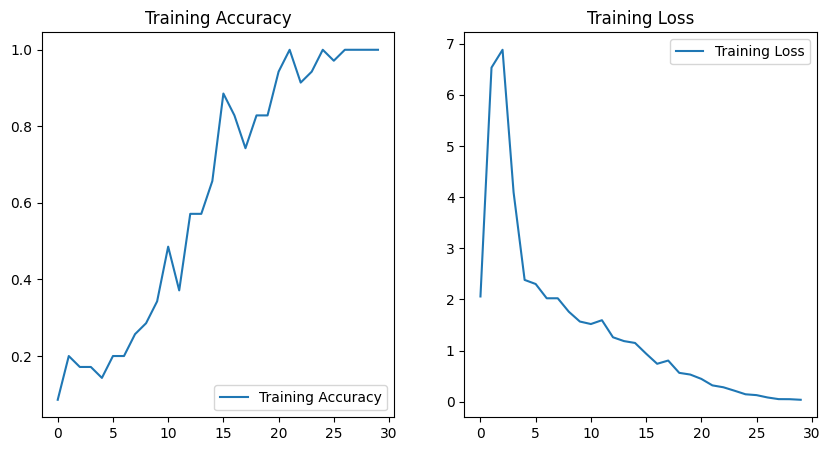

In [ ]:
# Vẽ biểu đồ độ chính xác và độ mất mát của mô hình trong quá trình huấn luyện
acc = train.history['accuracy']
loss = train.history['loss']
epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

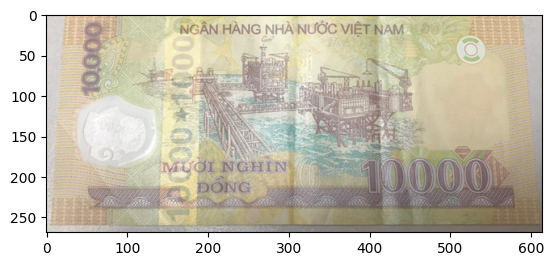

1/1 [==============================] - 0s 141ms/step
Đồng này là  Tien10k [3.1818177e-11 8.6841715e-07 9.5733756e-01 4.2130979e-09 3.6322348e-02
 2.8629757e-03 3.4457576e-03 3.0527226e-05]
0.95733756


In [ ]:
from keras.saving.saving_lib import load_model
import matplotlib.pyplot as plt
from keras.models import load_model
model=load_model("/content/drive/MyDrive/Colab Notebooks/Data/VNbanknotes.h5")

class_name = ["","Tien5k","Tien10k","Tien20k","Tien50k","Tien100k","Tien200k","Tien500k"]
img1=load_img('/content/drive/MyDrive/AI_Picture/VNbanknotes_Data/Test/Tien10k (2).jpg')
plt.imshow(img1)
plt.show()
img1=load_img('/content/drive/MyDrive/AI_Picture/VNbanknotes_Data/Test/Tien10k (2).jpg',target_size=(200,200))
img1=img_to_array(img1)
img1=img1.reshape(1,200,200,3)
img1=img1.astype('float32')
img1=img1/255
predict=model.predict(img1)
print("Đồng này là ", class_name[np.argmax(predict[0])], (predict[0]))
print(np.max(predict[0],axis=0))

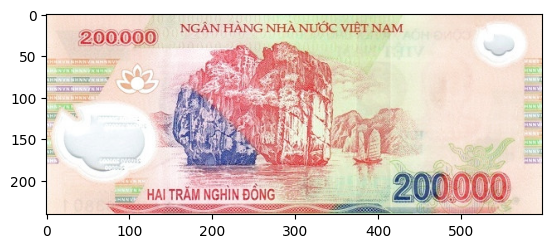

1/1 [==============================] - 0s 63ms/step
Đồng này là  Tien200k [7.5496089e-15 6.8550108e-08 4.8039699e-04 2.2949091e-13 6.4985181e-04
 2.1263495e-06 9.9886763e-01 2.6442828e-09]
0.99886763


In [ ]:
class_name = ["","Tien5k","Tien10k","Tien20k","Tien50k","Tien100k","Tien200k","Tien500k"]
img2=load_img('/content/drive/MyDrive/AI_Picture/VNbanknotes_Data/Test/Tien200k (5).jpg')
plt.imshow(img2)
plt.show()
img2=load_img('/content/drive/MyDrive/AI_Picture/VNbanknotes_Data/Test/Tien200k (5).jpg',target_size=(200,200))
img2=img_to_array(img2)
img2=img2.reshape(1,200,200,3)
img2=img2.astype('float32')
img2=img2/255
predict=model.predict(img2)
print("Đồng này là ", class_name[np.argmax(predict[0])], (predict[0]))
print(np.max(predict[0],axis=0))

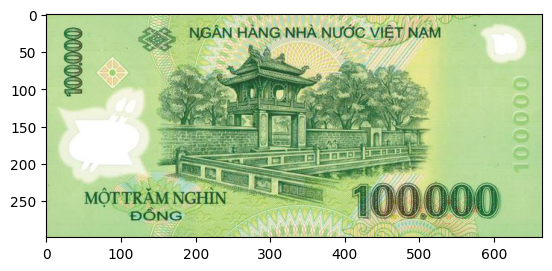

1/1 [==============================] - 0s 58ms/step
Đồng này là  Tien100k [3.1426613e-14 1.9365983e-11 3.1583037e-04 1.3392478e-09 1.0427676e-07
 9.9968374e-01 1.2611642e-07 2.1985572e-07]
0.99968374


In [ ]:
class_name = ["","Tien5k","Tien10k","Tien20k","Tien50k","Tien100k","Tien200k","Tien500k"]
img3=load_img('/content/drive/MyDrive/AI_Picture/VNbanknotes_Data/Test/Tien100k (2).jpg')
plt.imshow(img3)
plt.show()
img3=load_img('/content/drive/MyDrive/AI_Picture/VNbanknotes_Data/Test/Tien100k (2).jpg',target_size=(200,200))
img3=img_to_array(img3)
img3=img3.reshape(1,200,200,3)
img3=img3.astype('float32')
img3=img3/255
predict=model.predict(img3)
print("Đồng này là ", class_name[np.argmax(predict[0])], (predict[0]))
print(np.max(predict[0],axis=0))